# CART Decision Trees: Aggregated Tree Census Data 

#### Variables included in the analyses were selected in part due to relationships found during data exploration. 

Classification and Regression Trees (CART): The outcome (dependent) variable is categorical (although it could be continuous) and the predictor (independent) variables can be continuous or categorical variables (binary). The model creates binary split at deicision points to arrive at its final classifcation decision.

In [98]:
library(rpart)
library(rpart.plot)
library(ggplot2)
library(caret)

setwd("C:/Users/ear51/DAAN- Graduate School/Other Projects/Trees/Processed Data Files")
agg_data <- read.csv("Joined_aggregate_data.csv")

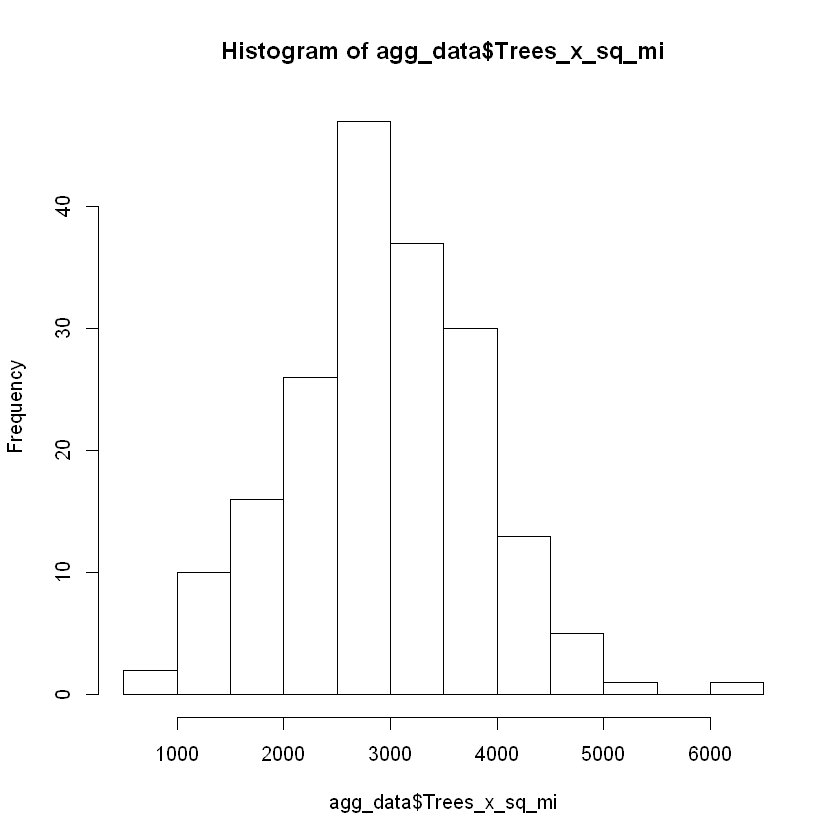

In [99]:
hist(agg_data$Trees_x_sq_mi)

#### Partition the tree density data into bins based on 25th percentile: low and not low

In [100]:
summary(agg_data$Trees_x_sq_mi)

agg_data$density_bins <- ifelse(agg_data$Trees_x_sq_mi >=2416.6 , "not_low", "low")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  718.4  2416.6  2886.8  2944.5  3578.2  6492.6 

#### Build CART model.

In [101]:
cart_1 <- rpart(density_bins ~ SelfEmployed + Hosp_Adults_Avg_Yr_Rate_per_10K + Construction + Production + Transit + IncomePerCap + Professional+ PrivateWork,
                data = agg_data, control = rpart.control(minsplit = 3, xval = 0, cp = 0.035))

summary(cart_1)

Call:
rpart(formula = density_bins ~ SelfEmployed + Hosp_Adults_Avg_Yr_Rate_per_10K + 
    Construction + Production + Transit + IncomePerCap + Professional + 
    PrivateWork, data = agg_data, control = rpart.control(minsplit = 3, 
    xval = 0, cp = 0.035))
  n= 188 

          CP nsplit rel error
1 0.14893617      0 1.0000000
2 0.05319149      1 0.8510638
3 0.04255319      7 0.5319149
4 0.03500000      8 0.4893617

Variable importance
                   SelfEmployed Hosp_Adults_Avg_Yr_Rate_per_10K 
                             31                              20 
                        Transit                    Construction 
                             15                               9 
                   IncomePerCap                      Production 
                              9                               7 
                   Professional                     PrivateWork 
                              6                               4 

Node number 1: 188 observations,    c

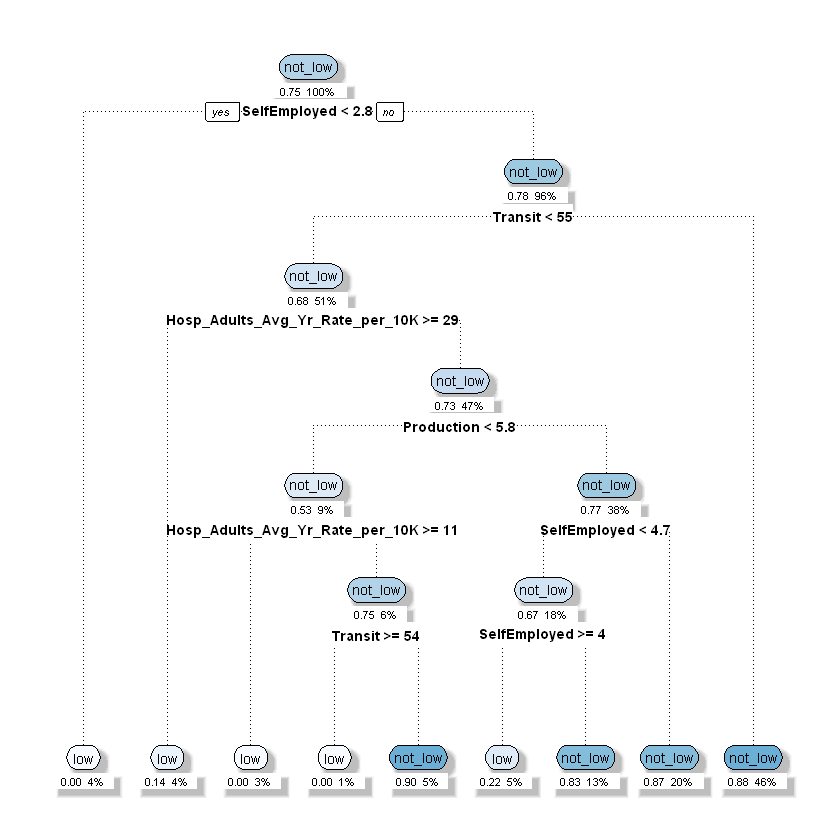

In [102]:
rpart.plot(cart_1, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

#### Predictive accuracy, confusion matrix and other model performance evluation

In [103]:
#Prediction accuracy
predicted_bin= predict(cart_1,agg_data, type = "class")
mean(predicted_bin == agg_data$density_bins) 

[1] 0.8776596

In [104]:
confusion_matrix <- table(predicted = predicted_bin, actual = agg_data$density_bins)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.65
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.829787234042553
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.728971962616822
F1score

         actual
predicted low not_low
  low      27       3
  not_low  20     138

[1] 0.8734177

[1] 0.9787234

[1] 0.9230769

#### Now trying the model using partitioned data

In [105]:
set.seed(266)
sampling_vector <- createDataPartition(agg_data$density_bins, p = 0.80, list = FALSE)
agg_data_train <- agg_data[sampling_vector,]
agg_data_test <- agg_data[-sampling_vector,]

cart_2 <- rpart(density_bins ~ SelfEmployed + Hosp_Adults_Avg_Yr_Rate_per_10K + Construction + Production + Transit + IncomePerCap + Professional+ PrivateWork,
                data = agg_data_train, control = rpart.control(minsplit = 3, xval = 0, cp = 0.035))

summary(cart_2)

Call:
rpart(formula = density_bins ~ SelfEmployed + Hosp_Adults_Avg_Yr_Rate_per_10K + 
    Construction + Production + Transit + IncomePerCap + Professional + 
    PrivateWork, data = agg_data_train, control = rpart.control(minsplit = 3, 
    xval = 0, cp = 0.035))
  n= 151 

          CP nsplit rel error
1 0.10526316      0 1.0000000
2 0.06578947      1 0.8947368
3 0.05263158      3 0.7631579
4 0.03684211      4 0.7105263
5 0.03500000      9 0.5263158

Variable importance
                   SelfEmployed                    Construction 
                             22                              19 
                        Transit Hosp_Adults_Avg_Yr_Rate_per_10K 
                             14                              11 
                   IncomePerCap                     PrivateWork 
                             11                              11 
                   Professional                      Production 
                              8                               4 

N

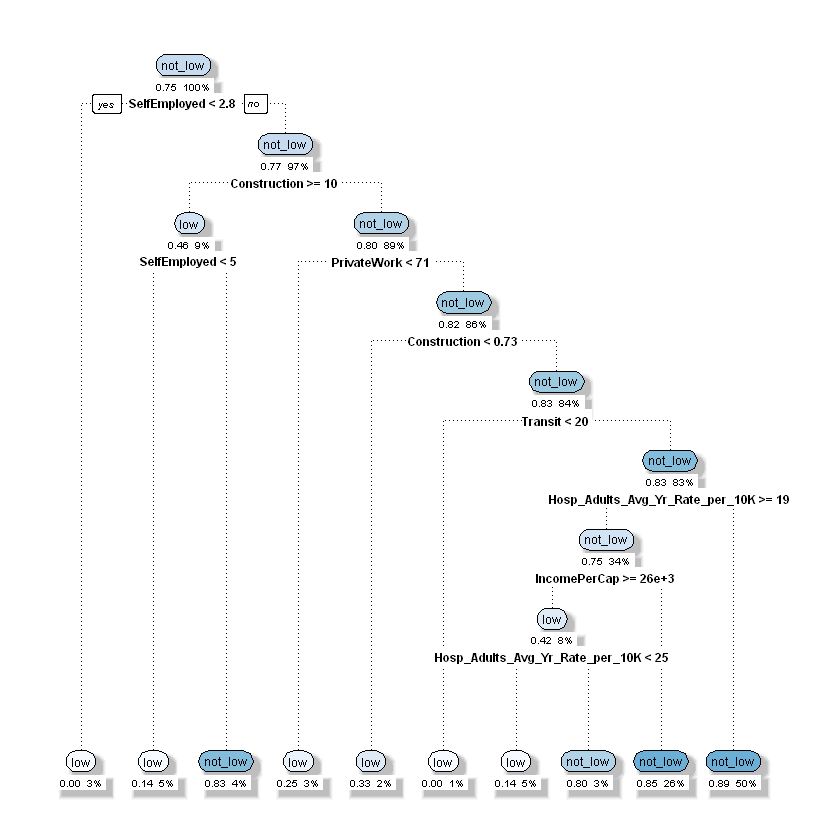

In [106]:
rpart.plot(cart_2, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

#### Test and Train accuracies

In [107]:
#Train prediction accuracy
predicted_bin= predict(cart_2,agg_data_train, type = "class")
mean(predicted_bin == agg_data_train$density_bins) 

#Test prediction accuracy
predicted_bin= predict(cart_2,agg_data_test, type = "class")
mean(predicted_bin == agg_data_test$density_bins) 

[1] 0.8675497

[1] 0.7567568

#### Prediction Performance Evaluation

In [108]:
#Confusion Matrix, etc.
confusion_matrix <- table(predicted = predicted_bin, actual = agg_data_test$density_bins)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.65
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.829787234042553
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.728971962616822
F1score

         actual
predicted low not_low
  low       3       3
  not_low   6      25

[1] 0.8064516

[1] 0.8928571

[1] 0.8474576